# Air Passenger Satisfaction

## Introduction

###### This is a model that predicts the satisfaction of passengers travelling in flights from a survey that was conducted in the US. The data was gathered from Kaggle. More than the creating the model, the main area of focus is to determine what are the features that drive customer satisfaction.

We can see in the dataset that there are passengers who are have travelled in three classes; the Eco Class,Eco Plus and the Business Class. As per their travel experience, they have rated their experience, they have rated their  journey on the scale of 0-5 for various categories like Inflight Entertainment, Ease of Online Booking, On-Board Service, Checkin Service, Convenience of Departure and Arrival timings and more. The main column that we look out for in this is the satisfaction which has two types; one for the passengers who are satisfied and the other for those who are dissatisfied or are neutral about their flight journey experience.

# Imporing the libraries and Data Preprocessing

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset and checking the first 5 entries
df = pd.read_csv('Air_Passengers.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#Dropping the Unnamed: 0 column as it has no significance on the dataset
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
#Checking for null values and we can see that there are a few null values which will be filled up later
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Here, satisfaction has two types, one is neutral or dissatisfied and the other satisfied. It will be replaced with 0 for neutral or dissatisfied and 1 for satisfied as a machinelearning model only takes in numerical values. There are other categorical variables in the dataset which  will be replaced with numerical values later.

In [9]:
df['satisfaction'].replace({'neutral or dissatisfied' : 0, 'satisfied' : 1},inplace=True)

In [10]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [11]:
#The Arrival Delay in Minutes has a few missing values and it is filled with the mean.
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

### Checking for Imbalance

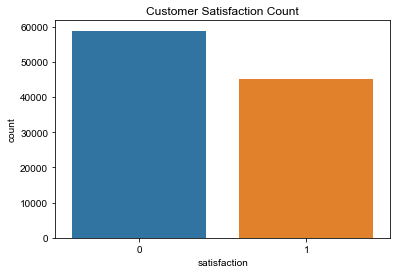

In [12]:
plt.figure()
sns.countplot(x='satisfaction',data=df)
plt.title('Customer Satisfaction Count')
sns.set_style('ticks')

The data is balanced well between the two categories and hence no balancing of data is required for this dataset.

# Exploratory Data Analysis

Text(0.5, 1.0, 'Customer Satisfaction Based on Gender')

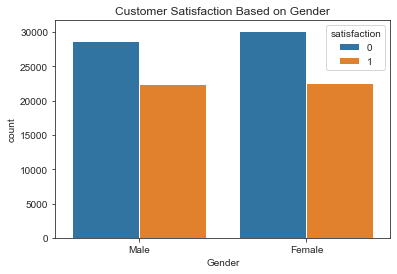

In [13]:
sns.countplot(x='Gender',data=df,hue='satisfaction')
plt.title('Customer Satisfaction Based on Gender')

The number of satisfied customers for both male and  female is almost the same but we can see that for both of them, the number of dissatisfied or neutral customers are on the higher side.

Text(0.5, 1.0, 'Age vs Passenger Satisfaction')

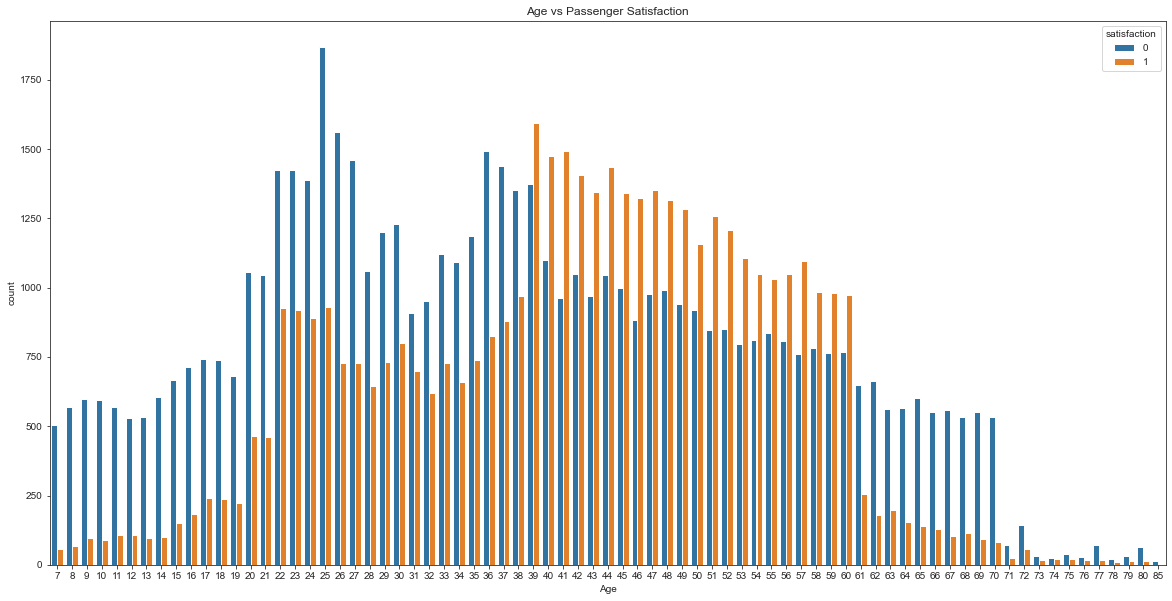

In [134]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',data=df,hue='satisfaction')
plt.title('Age vs Passenger Satisfaction')

There are a lot of passengers aged between 7-39 and 60-70 who seem to dissatisfied and the airline companies may have to look into ways in which they can make the journey satisfactory for this group of passengers.

Text(0.5, 1.0, 'Customer Satisfaction Based on Class')

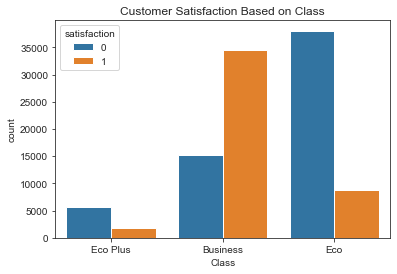

In [14]:
sns.countplot(x='Class',data=df,hue='satisfaction')
plt.title('Customer Satisfaction Based on Class')

Here, we can see that there is a high number of neutral or dissatisfied customers in the Economy Class compared to the Eco Plus and Business Classes. The Eco Plus Class also has a lot of dissatisfied or neutral passengers compared to the satisfied.

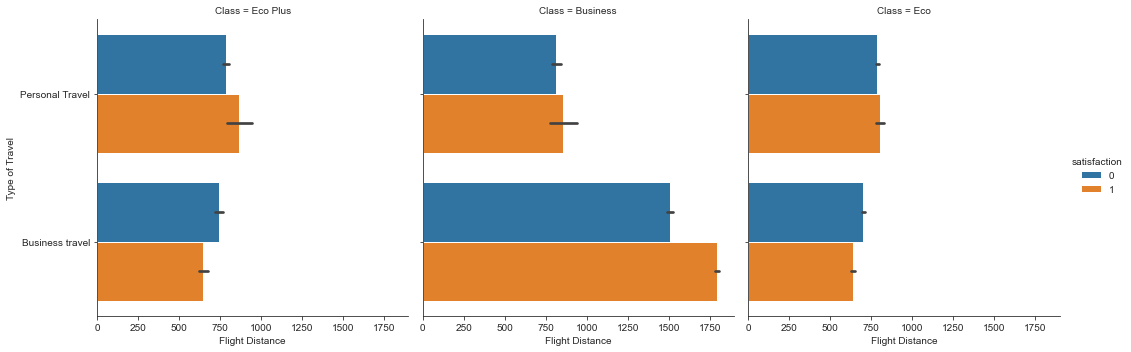

In [15]:
g = sns.catplot(x='Flight Distance',y='Type of Travel',hue='satisfaction',col='Class',data=df,kind='bar')

There are a lot of satisfied customers who are travelling long distances for the Business purposes in Business Class. There is also has a high number of neutral or dissatisfied customers.

For the rest, the ratio seems to be almost equal.

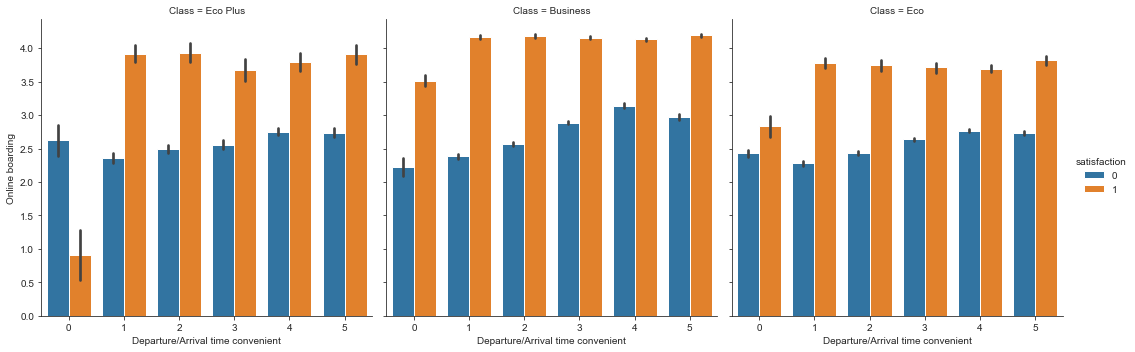

In [16]:
g = sns.catplot(x='Departure/Arrival time convenient',y='Online boarding',hue='satisfaction',col='Class',data=df,kind='bar')

It looks like the number of neutral or dissatisfied passengers are more than the satisfied passengers for Eco Plus Class with Departure/Arrival Time Convenient=0 despite the online boarding. The airline may have to look at these and make sure to improve their services.

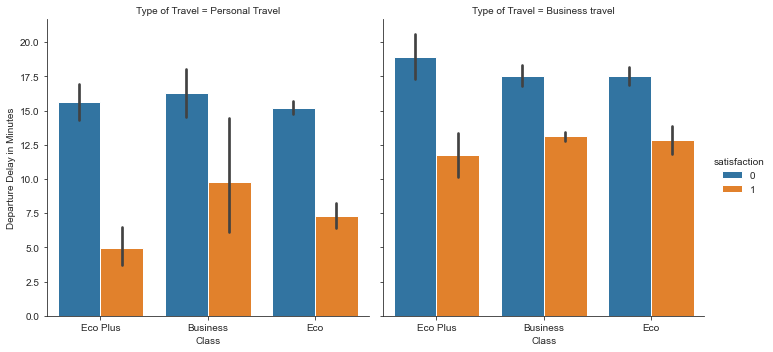

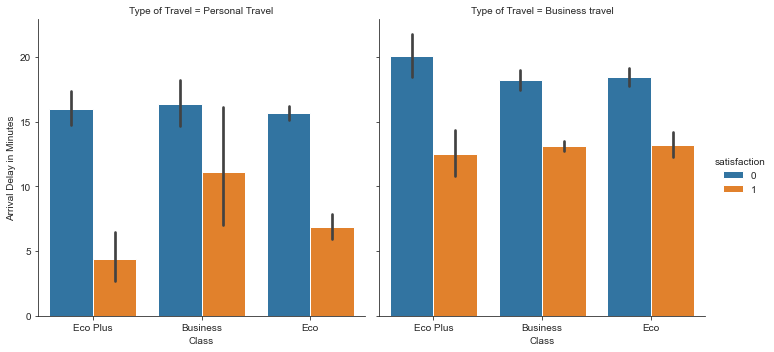

In [17]:
g = sns.catplot(x='Class',y='Departure Delay in Minutes',hue='satisfaction',col='Type of Travel',data=df,kind='bar')

g = sns.catplot(x='Class',y='Arrival Delay in Minutes',hue='satisfaction',col='Type of Travel',data=df,kind='bar')

No one is happy when their flight gets delayed or arrives late. But, when we look at the plots, we can see that there are a lot of dissatisfied or neutral customers compared to the satisfied customers for those who are travelling in Eco Plus class and are are on a Personal Travel.

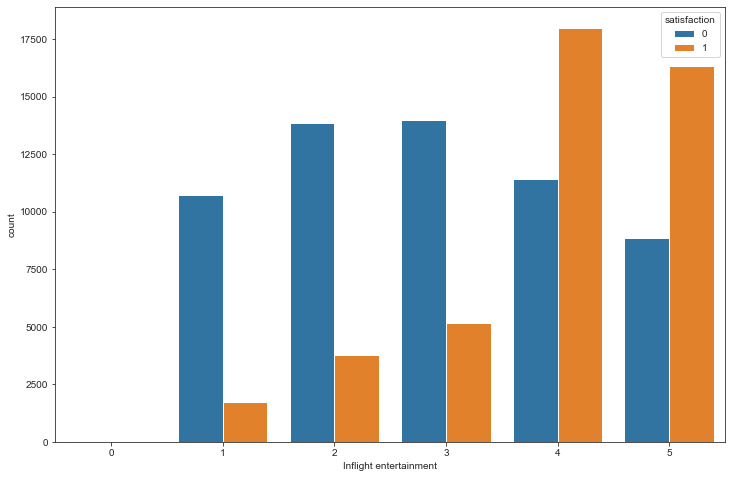

In [147]:
plt.figure(figsize=(12,8))
sns.countplot(x='Inflight entertainment',data=df,hue='satisfaction')

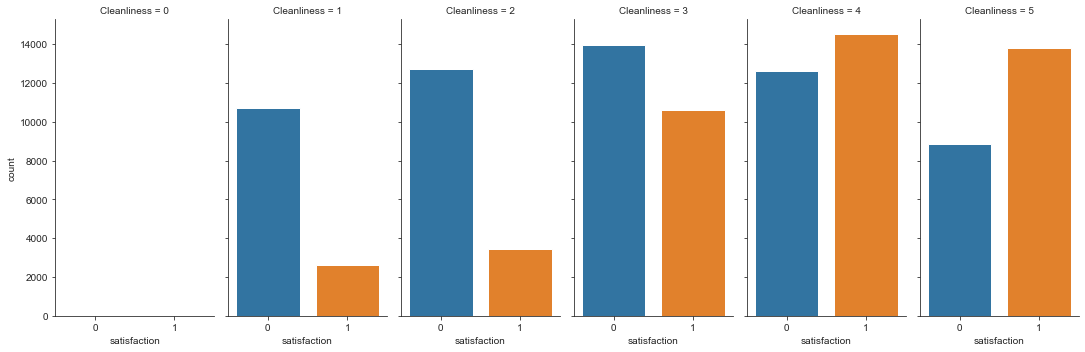

In [19]:
g = sns.catplot('satisfaction',col='Cleanliness',data=df,kind='count',aspect=0.5)

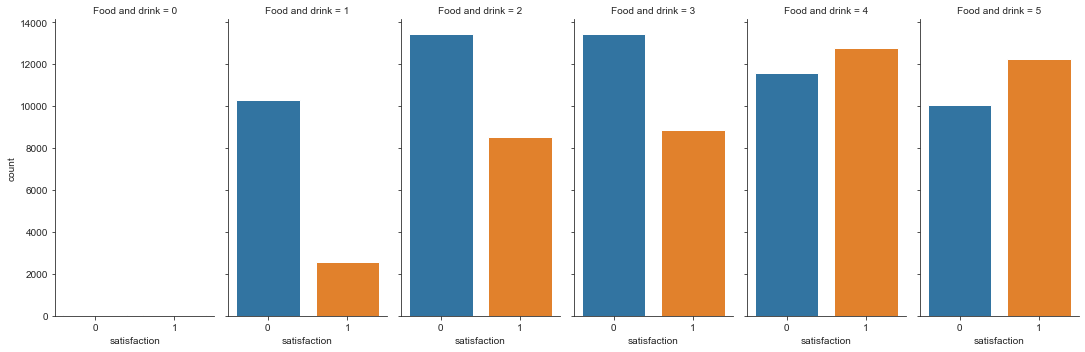

In [20]:
g = sns.catplot('satisfaction',col='Food and drink',data=df,kind='count',aspect=0.5)

For the Inflight Entertainment, Food and drink as well and Cleanliness columns, the ratings are given on the scale of 0-5. The satisfied customers belong to the ones who have rated 4 and 5 and most of the dissatisfied or neutral customers have given a rating below 4. 

### Label Encoding for the Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
#df.info()

In [24]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])

# Feature Selection and Importance

In [25]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [27]:
print(model.feature_importances_)

[0.01931103 0.00663224 0.05886541 0.0190322  0.14495004 0.07404739
 0.02427775 0.12840438 0.01822848 0.03993588 0.01669428 0.01348921
 0.12674189 0.04416656 0.05905179 0.03256959 0.03351285 0.03175666
 0.02902806 0.0261423  0.03326033 0.00979468 0.01010698]


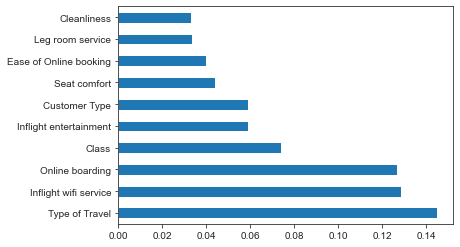

In [28]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()


In [29]:
#The top 10 features that are important are printed out here
print(ranked_features.nlargest(10))

Type of Travel            0.144950
Inflight wifi service     0.128404
Online boarding           0.126742
Class                     0.074047
Inflight entertainment    0.059052
Customer Type             0.058865
Seat comfort              0.044167
Ease of Online booking    0.039936
Leg room service          0.033513
Cleanliness               0.033260
dtype: float64


In [58]:
#The correlation of each column with respect to the target column which is satisfaction.
df.corr()['satisfaction']

id                                   0.013734
Gender                               0.012211
Customer Type                       -0.187638
Age                                  0.137167
Type of Travel                      -0.449000
Class                               -0.449321
Flight Distance                      0.298780
Inflight wifi service                0.284245
Departure/Arrival time convenient   -0.051601
Ease of Online booking               0.171705
Gate location                        0.000682
Food and drink                       0.209936
Online boarding                      0.503557
Seat comfort                         0.349459
Inflight entertainment               0.398059
On-board service                     0.322383
Leg room service                     0.313131
Baggage handling                     0.247749
Checkin service                      0.236174
Inflight service                     0.244741
Cleanliness                          0.305198
Departure Delay in Minutes        

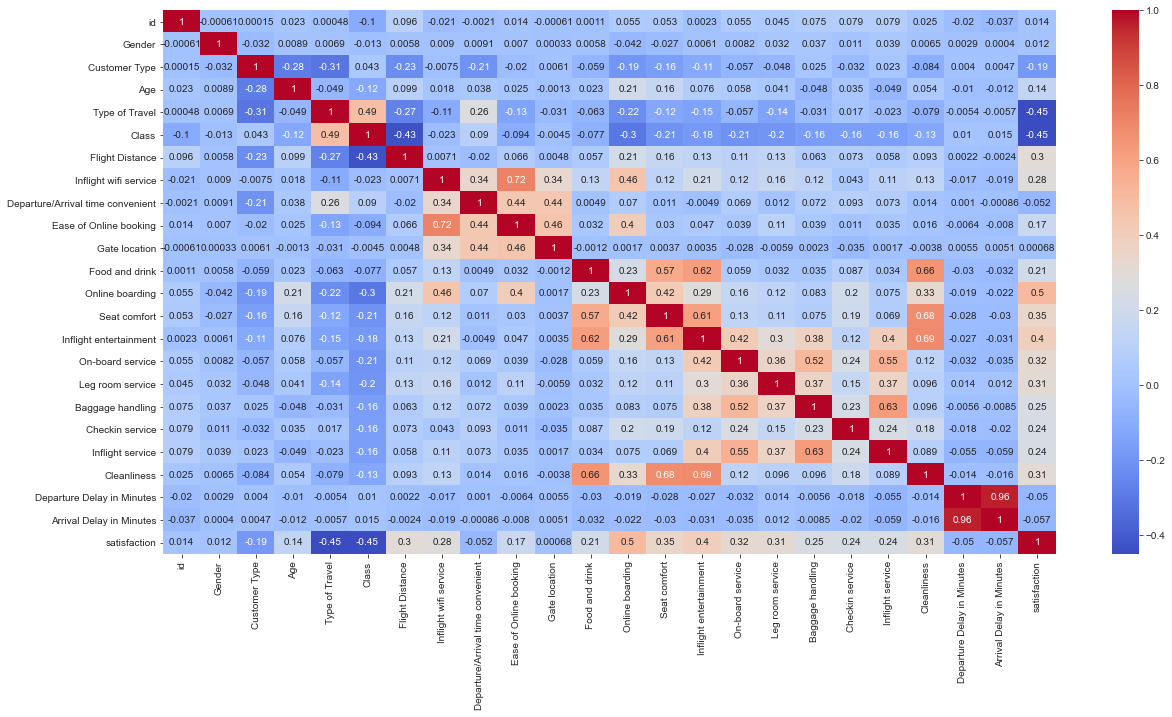

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Building Models

In [94]:
#Here, for X, I have selected the main features that will help us make predictions for our model better and will be used in
#the final model building.
final_X = df[['Type of Travel','Inflight wifi service','Online boarding','Class','Customer Type','Inflight entertainment',
          'Seat comfort','Ease of Online booking','Leg room service','On-board service','Cleanliness']]
final_y = df['satisfaction']

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve,confusion_matrix,roc_curve

In [96]:
X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.30, random_state=42)

### Scaling the values

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
X_train = scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

## Model 1 - Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [103]:
predictions = model_lr.predict(X_test)

In [140]:
print('Classification Report :')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,predictions))

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     17555
           1       0.86      0.83      0.84     13617

    accuracy                           0.87     31172
   macro avg       0.87      0.86      0.86     31172
weighted avg       0.87      0.87      0.87     31172



Confusion Matrix :
[[15743  1812]
 [ 2334 11283]]


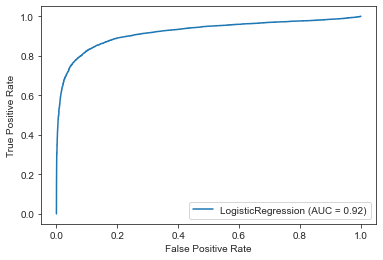

In [105]:
plot_roc_curve(model_lr,X_test,y_test)

The Logistic Regression Model gives us an accuracy of 87% and an AUC score of 0.92.

## Model 2 - Naive Bayes Classifier

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [108]:
predictionsnb = nb.predict(X_test)

In [141]:
print('Classification Report :')
print(classification_report(y_test,predictionsnb))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,predictionsnb))

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     17555
           1       0.87      0.83      0.85     13617

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



Confusion Matrix :
[[15833  1722]
 [ 2272 11345]]


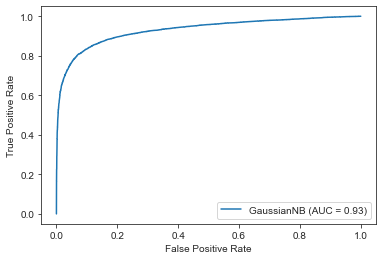

In [110]:
plot_roc_curve(nb,X_test,y_test)

The Naive Bayes Classifier gives us an accuracy of 87% and an AUC Score of 0.93.

## Model 3 - Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rcf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0,n_jobs=-1)
rcf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

Note : It is always best to perform hyperparameter tuning methods such as Grid Search or Randomized Search CV to select the best hyperparameters before creating the Random Forest Classifier model. Since my laptop is slow and there are a lot of records, performing hyperparameter tuning would take a lot of time and  thus I have skipped that step.

In [118]:
predictionsrcf = rcf.predict(X_test)

In [119]:
print(classification_report(y_test,predictionsrcf))
print(confusion_matrix(y_test,predictionsrcf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     17555
           1       0.95      0.93      0.94     13617

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172

[[16879   676]
 [  954 12663]]


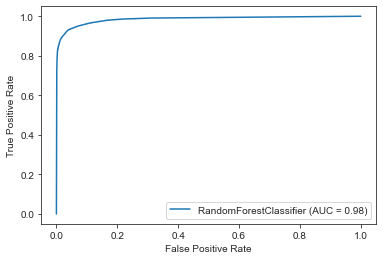

In [120]:
plot_roc_curve(rcf,X_test,y_test)

The Random Forest Classifier Model gives us an accuracy of 95% and an AUC Score of 0.98 and thus we can come to a conclusion that this model can be used to make predictions if the customers are satisfied or dissatisfied or neutral.

# Conclusion

##### Key takeaways from this analysis is that there are a lot of dissatisfied customers and the airline companies will have to make sure they look at the areas where there are more dissatisfied customers and look at ways in which they can do better to make sure the passengers have a fruitful journey.

##### The main things that they have to look into include the Arrival/Departure timings, Cleanliness and Inflight services like Food and Drink. They should also look at making the journey of Eco Class customers better as we can see many dissatisfied or neutral passengers who have travelled in that Class.